In [6]:
import numpy as np

In [7]:
def RMS_error(A,B):
    TEMP = np.zeros((len(A[:,0]),len(A[0,:])))
    TEMP = (A - B)**2
    stdev = np.sqrt(np.sum(TEMP)/(len(A[:,0])*len(A[0,:])))
    return stdev

def abs_error(A,B):
    TEMP = np.zeros((len(A[:,0]),len(A[0:,])))
    TEMP = np.abs(A - B)
    abserror = np.sum(TEMP)/(len(A[:,0])*len(A[0,:]))
    return abserror
              
def analq1(V,a,b,centre_x,centre_y,x,y):
    """
    V - potential at the further boundary
    a - radius of inner circle
    b - radius of outer circle
    x, y - coordinates
"""
    dist = (centre_x-x)**2+(centre_y-y)**2
    if dist<a**2:
        V_out=0
    elif dist>b**2:
        V_out=V
    else:
        V_out=V*(np.log(np.sqrt(dist)/a)/np.log(b/a))
    return V_out

In [28]:
fname = "../CPU_boundary_analysis/Q1_4/Q13.csv"
Data = np.loadtxt(fname, delimiter=';')
X = np.array([[i for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])
Y = np.array([[j for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])
Analsol = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol[i][j] = analq1(1.5,25,45,50,50,X[i][j],Y[i][j])

stdev = RMS_error(Data,Analsol)
print("Sigma ",stdev)
stdev = abs_error(Data,Analsol)
print("Absolute ",stdev)

Sigma  0.00321552663565
Absolute  0.00144772403267


In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

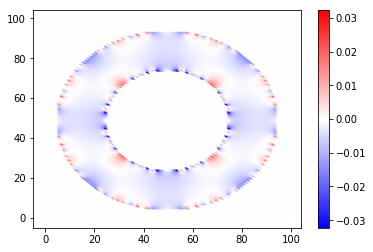

In [29]:
Diff = Data - Analsol
big = max(np.abs(Diff.max()),np.abs(Diff.min()))
norm = Normalize(vmin=-big,vmax=big)
plt.scatter(X,Y,c=Diff,cmap="bwr",norm=norm)
plt.colorbar()
plt.show()